# Dynamics

* **Author: Serge Bin**

* **Date: Jan. 29, 2026**

* **Time spent on this assignment: 5 hours**

## Overview

In this assignment you are going to first
* write a first-order integrator to solve differential equations (like dynamics)
* improve this to be a second-order integrator

Then you will
* compare the path of balls thrown with and without air resistance
* measure the terminal velocity of a falling object.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','scipy']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    plt.rcParams.update({"font.size": 14})
    return
import datetime;datetime.datetime.now()


datetime.datetime(2026, 2, 5, 7, 44, 47, 986997)

##  Warmups

### Lists to numpy arrays

In a number of cases you will hav a list like `a=[1.2,3.2,5.4]` and want to convert it to a numpy array.  To do this, you can do  `a=np.array(a)`

In [2]:
resetMe()
a=[1.2,3.2,5.4]
print(type(a))
a=np.array(a)
print(type(a))

<class 'list'>
<class 'numpy.ndarray'>


numpy arrays are useful because we do basic math operations on them (`+`,`-`,`*`,`/`) among other things we'll see.

---

In this exercise, we are going to have a list of numpy arrays.  
```python
positions=[np.array([0.0,1.0]),
           np.array([0.1,2.0]),
           np.array([0.2,3.0])]
```

We are going to convert that into a two dimensional array using `np.array(positions)`.

🦉Go ahead and make this conversion and then figure out how to seperately access the x positions and y positions (i.e. `positions[:,1])`

In [4]:
positions=[[0.0,1.0],[0.1,2.0],[0.2,3.0]] # this is an array of arrays
positions=np.array(positions) # convert to numpy array

print("shape of positions:", positions.shape, " first dimension is number of points, second dimension is x/y")


print(positions[:,1]) # y positions for all the points
print("The x positions should be [0.,0.1,0.2]")
print("The y positions should be [1.,2.,3.]")

shape of positions: (3, 2)  first dimension is number of points, second dimension is x/y
[1. 2. 3.]
The x positions should be [0.,0.1,0.2]
The y positions should be [1.,2.,3.]


### Math with numpy arrays

Imagine that I have a numpy array representing a velocity: `velocity=np.array([0.2,2.5])`.

I can now do math with this array in an intuitive way.  I could for example  take a time `dt=0.1` and multiply it by `dt`.  This will multiply both the "0.2" and "2.5".
 * Multiply by a scalar value `dt`: `velocity*dt`
 * Square: `velocity**2`
 * logarithm: `np.log(velocity)`
 * sin: `np.sin(velocity)`
 * Add two vectors: `x+velocity*dt`
etc:

All these operations are done *element-wise*; meaning that they are applied to each element in turn.


In [ ]:
resetMe()
dt=0.1
velocity=np.array([0.2,2.5])
print("dt =",dt)
print("velocity is\t",velocity)
print("dt*velocity is\t" ,dt*velocity)
print("velocity**2 is \t",velocity**2)

dt = 0.1
myVel is	 [0.2 2.5]
dt*myVel is	 [0.02 0.25]
myVel**2 is 	 [0.04 6.25]


### Fitting Lines

Suppose you have two arrays, `x` and `y` and you expect that there should be some linear relationship between $x$ and $y$.   



size of x: (40,)


Text(0.5, 1.0, 'Data plotted using objects')

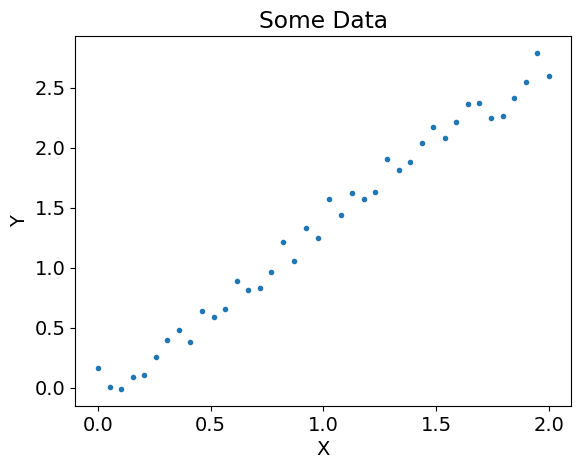

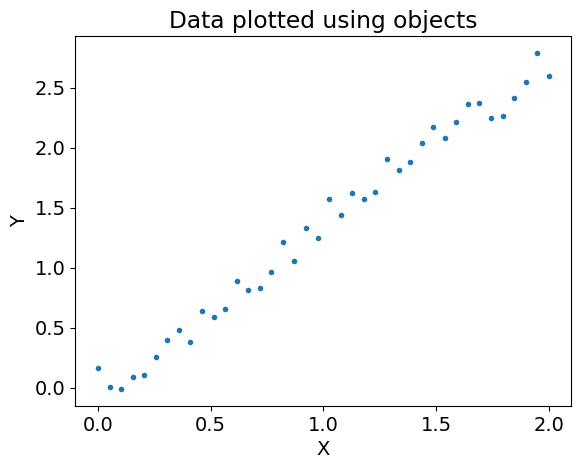

In [ ]:
slope=1.35
x = np.linspace(start=0,stop=2,num=40) # This will create a 1D array of shape (40,)
print("size of x:",x.shape)
# you can also call this as just np.linspace(0,2,40)
# slope*x is the underlying data, and then we add uniform noise from -0.2 to +0.2
y = slope*x + 0.4*(np.random.random(x.shape[0])-0.5)

plt.plot(x,y,'.')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Some Data")

# an alternative way to plot using objects
fig,ax=plt.subplots()
ax.plot(x,y,'.')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Data plotted using objects")


Now let's pretend that we didn't know the original slope and we'd like to extract it.

`myLine=np.polyfit(x,y,1)`.  If you then print out `myLine` you should see that it gives you a list where the first value is the slope and the second value the y-intercept.  

By the way, if you want to understand the arguments of the

The slope is 1.402181819755196 and the intercept is -0.06059016172536342
Help on _ArrayFunctionDispatcher in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.

    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.

    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.

    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.

    Parameters
    ----------
    x : array_like, shape (M,)
        x-co

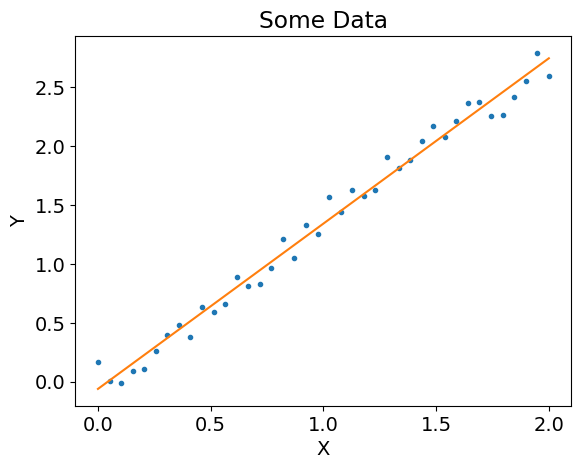

In [ ]:
# try it here
fit = np.polyfit(
    x,
    y,
    1 # degree of the polynomial -- this is a linear fit
) # returns the polynomial coefficients in descending order
print(f"The slope is {fit[0]} and the intercept is {fit[1]}")

help(np.polyfit) # help lets you understand how to use a function

plt.plot(x,y,'.')
plt.plot(x,fit[0]*x+fit[1])
# you can also do np.polyval(fit,x) # evaluates the polynomial at the points x

plt.xlabel("x")
plt.ylabel("y")
plt.title("Some Data")
plt.show()

### Fitting Polynomials

Suppose that you think you have some data which goes as $y = Ax^b$, but you don't know $b$. This is typically found using a log-log plot.

Note that $\log(y) = \log(A) + b\log(x)$.  
Plotting $\log(x)$ vs $\log(y)$ is called plotting the the data on a log-log scale. Let's look at how that might work.

Below is some data which has a polynomial relationship.  Notice how it looks quadratic.

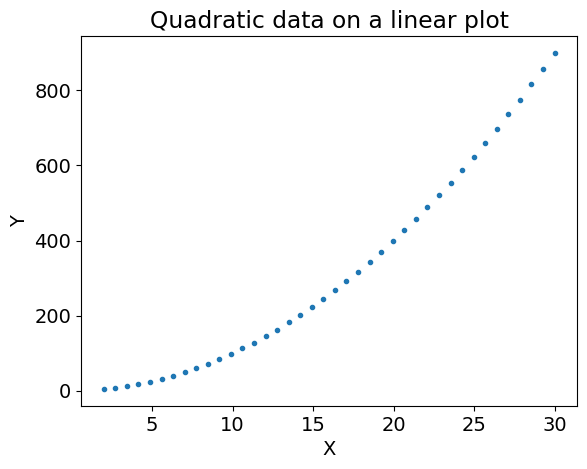

In [ ]:
slope=1.35
x = np.linspace(2,30,40)
y = x**2+2.0*(np.random.random(len(x))-0.5)
plt.plot(x,y,'.')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic data on a linear plot")
plt.show()

Let's go ahead and plot x and y on a log-log scale.  To do this redo the plot above but add
```python
plt.xscale('log')
plt.yscale('log')
```
before the `plt.show()`.

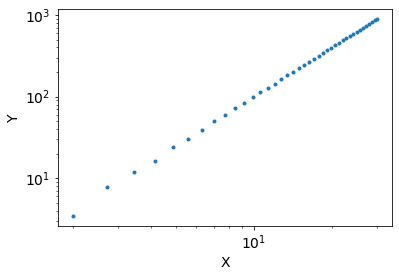

In [ ]:
###  plot things on a log-scale here.
plt.plot(x,y,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic data on a log-log plot")
plt.show()


You should notice your plot looks roughly linear.  We can go get the slope by doing a linear fit to the log-log plot. This can be done by doing
```python
myLine=np.polyfit(np.log(x),np.log(y),1)
print(myLine)
```

Go ahead and try this out.

In [ ]:
myLine=np.polyfit(np.log(x[1:]),np.log(y[1:]),1) #!#
print(myLine) #!#


[1.98207642 0.05154248]


You should see the slope recovers the $b$ of $y=Ax^b$.

Let's go ahead and plot to see how well this works

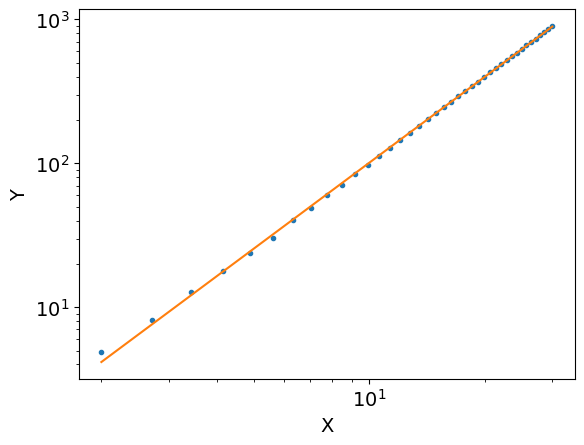

In [ ]:
plt.plot(x,y,'.')
plt.plot(x,np.exp(myLine[1])* x**myLine[0])
plt.xscale('log')
plt.yscale('log')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

---
---
---


## Exercise 1: Euler Integration

* **List of collaborators:**

* **References you used in developing your code:**

In this exercise we are going to learn how to simulate a ball thrown into the air.  To do this, we will need to learn how to simulate dynamics.

The secret to much of physics is differential equations.  Differential equations answer the following question:  given the current state of your physical system, what is its state in a moment of time ($dt$ seconds) later?

We recall that in Newtonian dynamics the following things are true:

$$F_y(t) = ma_y(t) \rightarrow a_y(t) = \frac{F_y(t)}{m} $$

$$ \frac{dv_y(t)}{dt} = a_y(t) \rightarrow dv_y(t) = a_y(t) dt $$

$$ \frac{dy(t)}{dt} = v_y(t) \rightarrow dy(t) = v_y(t) dt $$


Taking the first order in a Taylor series, we get for finite change in time $\Delta t$:

$$v_y(t+\Delta t) \simeq v_y(t) + a_y(t) \Delta t$$

$$y(t + \Delta t)  \simeq  y(t) + v_y(t) \Delta t$$


### a. Euler Integration in one-dimension (first order integrator)

We can use this to write a function that takes the current time, position, velocity and dt and then gives back out the new time, position, and velocity - i.e
```python
def step_gravity_1d(t,pos,vel,dt):
  """
  Starting with the position, velocity, and current time, return the next time, position, and velocity at time t+dt.
  The force applied is -9.8 kg m/s^2 (assuming a mass of 1 and gravity).
  Args:
     t: scalar, current time (s)
     pos: scalar, position at time t (m)
     vel: scalar, velocity at time t (m/s)
     dt: scalar, timestep (s)
  Returns
    tuple containing new time, new position, new velocity
  """
  return (new_t,new_pos,new_vel)
```

As our force, we will use gravity - i.e. $F_y=-9.8m$ -  and choose a mass of $m = 1$.
🦉Write your step function.  We are then going to call it five times after throwing a ball into the air and make sure you get the correct result.

**The velocity you should use to update the position is not the new velocity.  It is the current velocity.**

🦉 *Put your code here including your step function.*

*To test your code, use these initial parameters:*

```python
t   = 0    # set the initial time.
vel = 2.0  # throwing it into the air at 2 m/s
pos = 1.5  #  We threw it while standing from 1.5 meters tall.
dt  = 0.01 # We will take time steps of 0.01 seconds.
```

*and then step it five times in a row to get the answer after $T=0.05$ seconds*

```python
t,pos,vel=Step(t,pos,vel,dt) # After 0.01 seconds
t,pos,vel=Step(t,pos,vel,dt) # After 0.02 seconds
t,pos,vel=Step(t,pos,vel,dt) # After 0.03 seconds
t,pos,vel=Step(t,pos,vel,dt) # After 0.04 seconds
t,pos,vel=Step(t,pos,vel,dt) # After 0.05 seconds
```

*At the end you should get matching results*
```python
print("t should be 0.05,\t t="      ,round(t,4))
print("pos should be 1.5902;\t pos=",round(pos,4))
print("vel should be 1.51,\t vel="  ,round(vel,4))
```

*(You will also include your answer here for switching the 5 steps into a loop)*

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [6]:
#### ANSWER HERE
def Step(t,pos,vel,dt):
  new_t = t + dt
  new_vel = vel - 9.8 * dt
  new_pos = pos + vel * dt

  return (new_t,new_pos,new_vel)

t   = 0    # set the initial time.
vel = 2.0  # throwing it into the air at 2 m/s
pos = 1.5  #  We threw it while standing from 1.5 meters tall.
dt  = 0.01 # We will take time steps of 0.01 seconds.

t,pos,vel=Step(t,pos,vel,dt) # After 0.01 seconds
t,pos,vel=Step(t,pos,vel,dt) # After 0.02 seconds
t,pos,vel=Step(t,pos,vel,dt) # After 0.03 seconds
t,pos,vel=Step(t,pos,vel,dt) # After 0.04 seconds
t,pos,vel=Step(t,pos,vel,dt) # After 0.05 seconds

print("t should be 0.05,\t t="      ,round(t,4))
print("pos should be 1.5902;\t pos=",round(pos,4))
print("vel should be 1.51,\t vel="  ,round(vel,4))

t should be 0.05,	 t= 0.05
pos should be 1.5902;	 pos= 1.5902
vel should be 1.51,	 vel= 1.51


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

🦉 Modify your code so that it runs in a loop, and verify that you still get the right answers.  Your loop should look something like
```python
T=0.05
nsteps = int(np.ceil(T/dt))
for step in range(0,nsteps):
  # do stuff
```

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [9]:
T=0.05
t   = 0
vel = 2.0
pos = 1.5
dt  = 0.01

nsteps = int(np.ceil(T/dt))
for step in range(0,nsteps):
  t,pos,vel=Step(t,pos,vel,dt)
  print(f"After {step * dt} seconds: t={round(t, 4)}, pos={round(pos, 4)}, vel={round(vel, 4)}")

After 0.0 seconds: t=0.01, pos=1.52, vel=1.902
After 0.01 seconds: t=0.02, pos=1.539, vel=1.804
After 0.02 seconds: t=0.03, pos=1.5571, vel=1.706
After 0.03 seconds: t=0.04, pos=1.5741, vel=1.608
After 0.04 seconds: t=0.05, pos=1.5902, vel=1.51


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. Euler Integration  in two dimensions  (first order integrator)


We now have a step function that allows us to work in one-dimension.  Balls are sometimes thrown in directions other then straight up, though.  Let's modify our code to also work in two dimensions.   In addition to the equation for $a_y,v_y,y$ we can also have a similar set of equations for $a_x,v_x,x$:
*  $v_x(t+\Delta t) = v_x(t) + a_x(t) \Delta t$
*  $x(t+\Delta t)   = x(t) + v_x(t) \Delta t$

It makes sense to write the equations for x and y in a uniform "vector" or "array" format -i.e.
* [$v_x(t+\Delta t),v_y(t+\Delta t)$] = [$v_x(t),v_y(t)$] + [$a_x(t),a_y(t)$] $\Delta t$
* [$x(t+\Delta t),y(t+\Delta t)$] = [$x(t),y(t)$] + [$v_x(t),v_y(t)$] $\Delta t$

We are now going to modify our step function to work in in two dimensions, so pos and vel will be changed to be numpy arrays of, for example, [xPosition,yPosition].

You could implement this by doing something like this:
```python
newpos = pos.copy()
newpos[0]= pos[0]+ vel[0]*dt
newpos[1]= pos[1]+ vel[1]*dt
```
but equivalently you could also do
```python
newpos = pos + vel*dt
```
which would work in both 2d and 3d.

🦉Rewrite your `step` function to work in two dimensions and try to avoid ever doing `vel[0]` or `pos[0]` to explicitly take a velocity or position in the x-direction. It should look like

``` python
def step_gravity_2d(t, pos, vel, dt):
  """
Starting with the position, velocity, and current time, return the next time, position, and velocity at time t+dt.
  The force applied is -9.8 kg m/s^2 (assuming a mass of 1 and gravity).
  Args:
     t: scalar, current time (s)
     pos: np.array of shape (2,), position at time t (m)
     vel: np.array of shape (2,), velocity at time t (m/s)
     dt: scalar, timestep (s)
  Returns
    tuple containing new time, new position, new velocity

  """
  assert isinstance(pos, np.ndarray), "pos must be a np.ndarray"
```


🦉 *Test use the following initial conditions*

```python
t   = 0 # set t0
dt  = 0.01 # time step
T = 0.05 # total time to run
vel = np.array([0.1,10.])  # initial velocity in m/s
pos = np.array([0.0,0.0])  # m
```

*You should get the following:*

```python
print("t should be 0.05,\t t=" ,round(t,4))
print("[x,y] should be [0.005,0.4902];\t [x,y]=" ,pos)
print("[vx,vy] should be [0.1,9.51],\t [vx,vy]=" ,vel)
```

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [4]:
###ANSWER HERE

def step_2d(t, pos, vel, dt):
  new_t = t + dt

  # Consider different acceleration in x&y directions
  new_vel = np.array([vel[0], vel[1] - 9.8 * dt])

  # One liner for new position
  new_pos = pos + vel * dt

  return (new_t, new_pos, new_vel)


t   = 0 # set t0
dt  = 0.01 # time step
T = 0.05 # total time to run
vel = np.array([0.1,10.])  # initial velocity in m/s
pos = np.array([0.0,0.0])  # m

nsteps = int(np.ceil(T/dt))
for step in range(0,nsteps):
  t,pos,vel= step_2d(t,pos,vel,dt)
  print(f"After {step * dt + 0.01} seconds: t={round(t, 4)}, pos={pos}, vel={vel}")

# print("t should be 0.05,\t t=" ,round(t,4))
# print("[x,y] should be [0.005,0.4902];\t [x,y]=" ,pos)
# print("[vx,vy] should be [0.1,9.51],\t [vx,vy]=" ,vel)

NameError: name 'np' is not defined

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c.  A full simulation

In this part we are going to write a full simulation and compute the path of a ball until it hits the ground.

🦉Write a function as follows:
```python
def throw_ball(init_pos, init_vel, dt):
    """
    Run a simulation of a thrown ball until the ball hits the ground (at y=0).
    Gravity of -9.8 m/s^2 is applied
    Arguments:
      init_pos: (2,) array given the initial positions.
      init_velocity: (2,) array giving the initial velocity.
      dt: scalar timestep
    Returns:
     (ts, vs, pos): (nsteps,), (nsteps, 2), (nsteps,2)
    """
```
* Initialize your time, height and velocity
* Intialize some lists to store your time, height and velocity at each step (i.e. `vs=[]`)
* Loop over time steps
    * Take a step
    * Put the velocity and position into lists (i.e. `velocities.append(v)`)
    * If the height is lower then zero, then `break` out of the loop (`if y<0: break`)
* Return  np.array of time, position, and velocity

🦉 Write a function `def throw_ball_exact(initPos,initVel,ts)` that returns the exact positions and velocities for all times in the array `ts`. Use the analytic solution from introductory mechanics.

🦉 Test your functions as follows:
   * Run the same five steps and initial conditions from part 1b, and confirm that `throw_ball` gets the same numbers.
   * Plot the output of `throw_ball` and `throw_ball_exact`, and confirm that they are very close. As `dt` becomes very small, they should agree.

*Put your code here. Using the same initial conditions as above, print the position and velocities of five steps so we can check that you have the correct answer.*
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [8]:
###ANSWER HERE
def throw_ball(init_pos, init_vel, dt):
    ts, vs, pos = [], [], []
    curr_pos = init_pos
    curr_vel = init_vel
    curr_t = 0

    # Repeat until y becomes 0
    while (curr_pos[1] >= 0 or curr_pos[0] == 0.0):
      # Append stuff
      ts.append(curr_t)
      vs.append(curr_vel)
      pos.append(curr_pos)

      # Do adjustments
      curr_t, curr_pos, curr_vel = step_2d(curr_t, curr_pos, curr_vel, dt)

    return (ts, vs, pos)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### d. Making Plots

We want to plot
* $y$ vs. $t$ (i.e. `plt.plot(ts,positions[:,1],label='first order integrator')`). Note that `x=positions[:,0]` and `y=positions[:,1]`.
* $v_y$ vs $t$
* $y$ vs. $x$

for both the exact and approximate curves. Use $dt=0.05$ s.

You must label your axis (`plt.xlabel("put actual label here...not what's written in this text")`)

Put on each of your plots the exact answer computed using formulas you know from Physics 211 (i.e. `plt.plot(ts,exact,label="Exact Answer")`.  Use `plt.legend()` to generate a legend so we know which line is which.



Your exact and integrator curves should look very similar but not exactly on top of each other (for the position).


*Put the code which generates the plots (and the plots) here.*
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

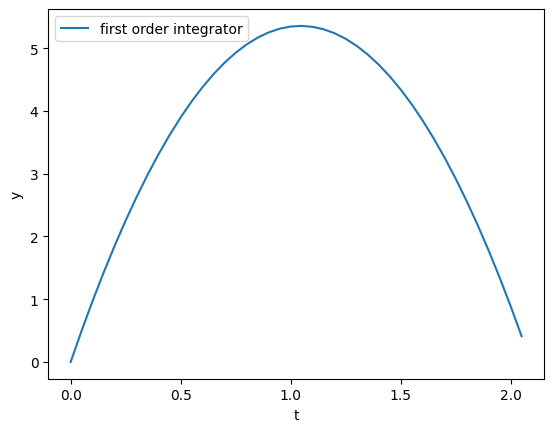

In [10]:
### ANSWER HERE
dt = 0.05
init_vel = np.array([0.1,10.])
init_pos = np.array([0.0,0.0])

ts, vs, pos = throw_ball(init_pos, init_vel, dt)

ys = [p[1] for p in pos]

# y vs. t
plt.plot(np.array(ts), np.array(ys), label='first order integrator')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

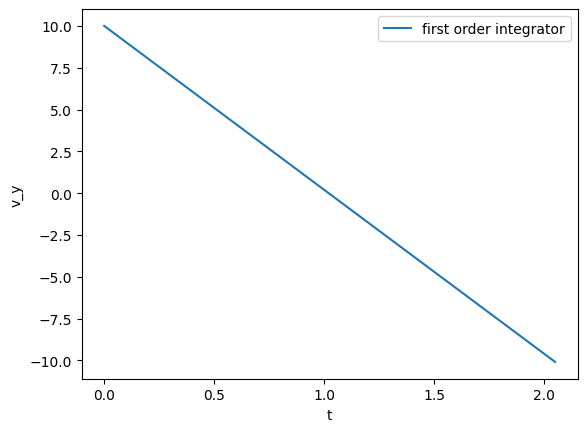

In [11]:
# v_y vs. t
v_ys = [v[1] for v in vs]
plt.plot(np.array(ts), np.array(v_ys), label='first order integrator')
plt.xlabel("t")
plt.ylabel("v_y")
plt.legend()
plt.show()

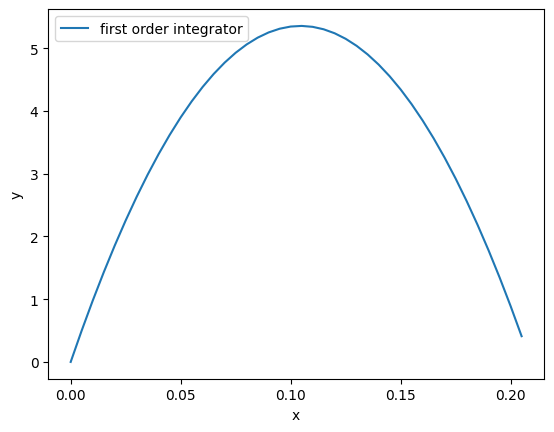

In [12]:
# y vs. x
xs = [p[0] for p in pos]
plt.plot(np.array(xs), np.array(ys), label='first order integrator')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### e.  Animation

If you send `animateMe` the list of positions it will animate them.  You shouldn't have to change any code here as long as you've got a list of positions in the array `positions`. 🦉Go ahead and watch your thrown ball!

Use it as follows:

```python
anim=animateMe(positions,True)
HTML(anim.to_jshtml())
```
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [14]:
from matplotlib import animation
from IPython.display import HTML

def animateMe(positions,fullLine=True):
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure();
    x_min=np.min(positions[:,0])
    x_max=np.max(positions[:,0])*1.1
    y_min=np.min(positions[:,1])
    y_max=np.max(positions[:,1])*1.1

    ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max));
    #line, = ax.plot([], [], lw=2);
    line, = ax.plot([], [],'bo', ms=10);
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.close(fig)
    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        x = positions[:,0]
        y = positions[:,1]
        if fullLine:
            line.set_data(positions[0:i,0], positions[0:i,1])
        else:
            line.set_data(positions[i,0], positions[i,1])
#        line.set_markersize(10)
        return line,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(positions), interval=20,
                                   blit=True,repeat=False);
    return anim


anim=animateMe(pos,True)
HTML(anim.to_jshtml())

TypeError: list indices must be integers or slices, not tuple

<Figure size 640x480 with 0 Axes>

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### f. Errors

In this section, we'd like to understand the error of your integrator.  For this problem, you can use the same initial conditions you've been using in the previous sections.
We will assess the error in two ways.

First, how does the error accumulate as a function of time (when we fix $dt$)?  
We will only concern ourselves with the difference between the Euler-integrator $y$ position and the exact $y$ position (i.e. we will ignore the $x$ position and velocity $v$).
What you will find is that the error grows linearly with $t$.  This makes sense because each step makes an error and so cumulatively the total amount of error grows linearly. That means the longer you run your system, the larger error that you get. This linear growth will be true for almost any integrator that we use (although something special will go on for symplectic integrators).

🦉 Plot the difference $y_\textrm{Euler}(t) - y_\textrm{exact}(t)$ as a function of time $t$ for several values of dt (try at least 0.005 and 0.32). Check that the smaller value of `dt` is closer to the exact path.

Secondly, as $dt \rightarrow 0$, we should obtain the same position at some time $T$. That is, if we run a bunch of simulations with different $dt$ to a total time $T=1.28$  how does the final position change with $dt$?

🦉Write a function as follows:
```python
def compute_position(dt, target_time):
  """
  For a fixed initial condition, run at timestep dt until the target time.
  Args:
    dt: timestep (s)
    target_time:  time at which to return the position (s)
  Returns:
    position at target_time
  """
  
```
Plot the $x$ and $y$ position for each value of $dt \in \{0.32,0.16,0.08,0.04,0.02,0.01,0.005\}$

While the error with time is always linear, the error with $dt$ can change depending on the quality of your integrator.  For the Euler-integrator you will find that the error with $dt$ is also linear telling you that you are working with a first order integrator.



*Put the two plots (and the code to generate them) here.*

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE
def compute_position(dt, target_time):
  return target_time / dt


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### g. Energy


Another important way of assessing errors is to verify the laws of physics are followed in our simulation.

As we know from classical mechanics, the total energy is a constant of motion.
Recall that the total energy is

$$ E = K + U = \frac{1}{2}mv^2 + mgy$$

where $g=9.8$

🦉Write a function that takes as arguments list of positions and velocities and returns a list of energy. You can assume that $m=1.$ Then plot the energy vs time of the ball thrown in the air with your integrator. You should see that the energy is nearly constant over time. Because our approach is not perfect, there is a tiny bit of drift in the energy. Run it for a couple different timesteps and check that it gets better with smaller timestep.

*Hint:*  the energy is around 50. Pay close attention to the scale on your plot; it may zoom in a lot.


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

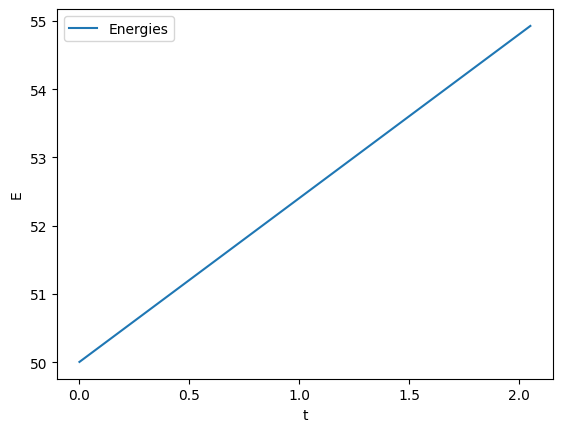

In [16]:
### ANSWER HERE
def energies(pos, vs):
  # Returns a list of energies at all times
  ee = []

  i = 0
  for p in pos:
    # Get speed v
    v = np.sqrt(vs[i][0] ** 2 + vs[i][1] ** 2)

    # Get energy
    e = 0.5 * v**2 + 9.8 * p[1]

    ee.append(e)
    i += 1

  return ee


ee = energies(pos, vs)

plt.plot(np.array(ts), np.array(ee), label='Energies')
plt.xlabel("t")
plt.ylabel("E")
plt.legend()
plt.show()







<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

---
---
---

## Exercise 2: Air resistance

* **List of collaborators:**
Serge Bin



* **References you used in developing your code:**

In this exercise we have two goals.

* One goal is to clean up our code so that it is more general (we will be using your 2d code).  We have a lot of hard-coded things running around and so we want to get rid of that.

* Our second goal is to modify our code so that it can work with air resistance.  We will be able to see how air resistance affects balls flying through the air.  We can also see how a dropped ball reaches terminal velocity.   

### a. Code Modifications

In this section you are going to modify your code to compute dynamics with air resistance.  The force should be of the form `np.array([-b*v_x,-b*v_y-9.8*m])`, where the constant `b` determines the strength of the air resistance. Because of the air resistance, the mass now matters, so that also needs to be an argument.


🦉Write a new step function to include air resistance.  
``` python
def step_air_resistance_2d(t, pos, vel, dt, m, b):
  """
Starting with the position, velocity, and current time, return the next time, position, and velocity at time t+dt.
  The force applied is (-9.8 m/s^2)*m - b * v  
  Args:
     t: scalar, current time (s)
     pos: np.array of shape (2,), position at time t (m)
     vel: np.array of shape (2,), velocity at time t (m/s)
     dt: scalar, timestep (s)
     m: mass (kg)
     b: air resistance (kg /s)
  Returns
    tuple containing new time, new position, new velocity

  """
  assert isinstance(pos, np.ndarray), "pos must be a np.ndarray"
```

🦉Write a new `throw_ball` function.  
```python
def throw_ball_air_resistance(init_pos, init_vel, dt, m, b):
    """
    Run a simulation of a thrown ball until the ball hits the ground (at y=0).
    Arguments:
      init_pos: (2,) array given the initial positions.
      init_velocity: (2,) array giving the initial velocity.
      dt: scalar timestep
    Returns:
     (ts, vs, pos): (nsteps,), (nsteps, 2), (nsteps,2)
    """
```

**Be careful to avoid global variables; your function must take in the parameters as arguments here.**

*Put your new code here. You don't have to produce any output (you will produce graphs below)*

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [3]:
resetMe()
### ANSWER HERE
def step_air_resistance_2d(t, pos, vel, dt, m, b):
  assert isinstance(pos, np.ndarray), "pos must be a np.ndarray"

  new_t = t + dt

  # Consider drag and gravity
  # a = F/m = -9.8 - bv/m
  new_vel = np.array([vel[0] + dt * (-b * vel[0] / m),
                      vel[1] + dt * (-b * vel[1] / m - 9.8)])

  # New position
  new_pos = pos + vel * dt

  return (new_t, new_pos, new_vel)




def throw_ball_air_resistance(init_pos, init_vel, dt, m, b):
    ts, vs, pos = [], [], []
    curr_pos = init_pos
    curr_vel = init_vel
    curr_t = 0

    # Repeat until y becomes 0
    while (curr_pos[1] >= 0 or curr_pos[0] == 0.0):
      # Append stuff
      ts.append(curr_t)
      vs.append(curr_vel)
      pos.append(curr_pos)

      # Do adjustments
      curr_t, curr_pos, curr_vel = step_air_resistance_2d(curr_t, curr_pos, curr_vel, dt, m, b)

    return (ts, vs, pos)



<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b.  Running and making Plots for Throwing a Ball

🦉For a ball in the air and make plots
* $y$ vs $t$
* $y$ vs $x$
that includes (on the same plot) both the ball with air resistance and without air resistance. To label which is which you can do `plt.plot(x,y,label="Air Resistance")`   and then call `plt.legend(loc=0)`

Use the following parameters:
```python
bs = [0, 0.1] # you can loop over these
m = 1
initial_pos = np.array([0.0,0.0])
initial_velocity = np.array([0.1, 10.0])
dt = 0.01
```

Does it make sense?  Under which conditions does the ball travel further?

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

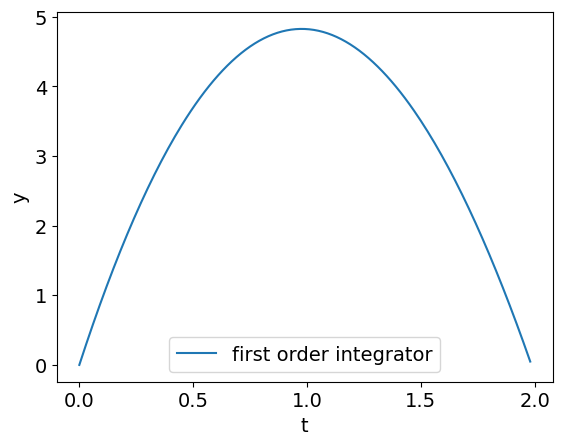

In [4]:
### ANSWER HERE
b = 0.1
m = 1
initial_pos = np.array([0.0,0.0])
initial_velocity = np.array([0.1, 10.0])
dt = 0.01


ts, vs, pos = throw_ball_air_resistance(initial_pos, initial_velocity, dt, m, b)
ys = [p[1] for p in pos]

# y vs. t
plt.plot(np.array(ts), np.array(ys), label='first order integrator')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c.   Running and making plots for dropping a ball.

Now we would like you to set up a simulation which has a ball being dropped.  The ball should have a mass of 1.0 kg and be dropped from a height of 1000 meters.  The air resistance value of $b$ should be 0.3.  Use again a time-step of 0.01.  

🦉We want you to plot
* $y$ vs. $t$
* $v_y$ vs $t$.

We want you to see that the $y$-velocity reaches a terminal velocity (i.e. you stop picking up speed as the object is falling).  

🦉Calculate by hand what the terminal velocity should be (consider when the force due to gravity and due to air reistance is the same) and draw a dotted line at this value on the plot (i.e. `plt.axhline(terminalVelocity,linestyle='--')`.  

*Plots and graph here.*
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE
init_pos = np.array([0.0, 1000.0])
init_vel = np.array([0.0, 0.0])
b = 0.3
m = 1
dt = 0.01

ts, vs, pos = throw_ball_air_resistance(init_pos, init_vel, dt, m, b)
ys = [p[1] for p in pos]

# v_final = mg/b
terminalVelocity = m * 9.8 / b


# y vs. t
plt.plot(np.array(ts), np.array(ys), label='none')
plt.xlabel("t")
plt.ylabel("y")
plt.axhline(terminalVelocity,linestyle='--')
plt.legend()
plt.show()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### d. Hitting a target

Let's suppose we want to throw a ball starting at position $(0,0)$ with some initial velocity `v0` (*which you will find*) and have it hit a target on the ground at position $(10.0,0.0)$ m. Let $b=3.0$ and $m=1.0$.  You may again use $dt=0.01$.  **We are going to use `scipy.optimize.minimize` to find the initial velocity.** The library `scipy.optimize` is very useful throughout this course.  

To achieve this, first write a function `def distance_from_target(init_vel,init_pos, dt, m, b):` which takes an initial velocity and a `params` dictionary.  The function should return how far (in absolute magnitude) a ball thrown with the parameters in `params` lands from the target (if included, ignore the initial velocity in params).  

Then you can call
```python
ans=scipy.optimize.minimize(distance_from_target,
                            initial_velocity_guess, # guess for the starting velocity
                            args=(init_pos, dt, m, b),
                            method='Nelder-Mead',
                            options={'disp': True})
```

and the values in `ans.x` should be the velocity you found.

🦉Graph the curve you find to make sure it hits close to the target.  Report your initial velocity.

*Plot and graph here. You want to have* `print(ans.x)` *at the end so we can see what your results are.*

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 60
         Function evaluations: 113
[3.43536348e+02 1.50299041e-01]


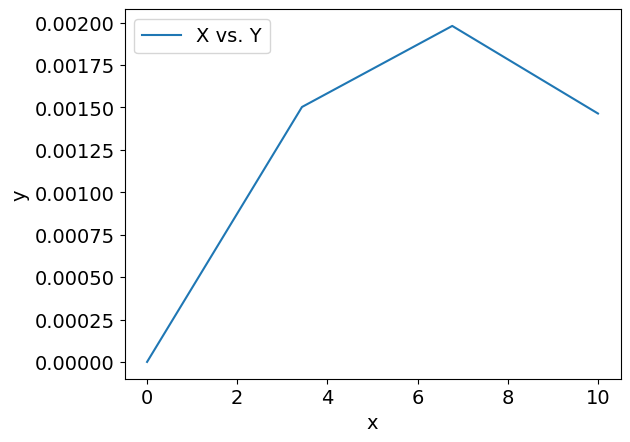

In [7]:
### ANSWER HERE
def distance_from_target(init_vel,init_pos, dt, m, b):
  _, _, pos = throw_ball_air_resistance(init_pos, init_vel, dt, m, b)

  # Return distance between x=10 and last x position
  return np.abs(10.0 - pos[-1][0])


init_pos = np.array([0.0, 0.0])
b = 3
m = 1
dt = 0.01

ans=scipy.optimize.minimize(distance_from_target,
                            np.array([1.0, 0.0]), # Initial velocity guess
                            args=(init_pos, dt, m, b),
                            method='Nelder-Mead',
                            options={'disp': True})

print(ans.x)

# Plot with this initial velocity
ts, vs, pos = throw_ball_air_resistance(init_pos, ans.x, dt, m, b)
ys = [p[1] for p in pos]
xs = [p[0] for p in pos]

plt.plot(np.array(xs), np.array(ys), label='X vs. Y')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# As you can see the plot kind of sucks (maybe my skill issue?)



<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### e. Hitting a moving target (extra credit: 5 points)

Here we want to launch two balls. One has fixed parameters
```python
b= 3.0
m = 1.0
initial_pos= np.array([0.0,0.0])
initial_velocity= np.array([10.0,10.0])
dt = 0.01,
target = 14.5
```

The other has the following parameters but you can optimize the initial velocity
```python
b= 3.0
m = 1.0
initial_pos= np.array([10.0,2.0])
initial_velocity= np.array([-1.0,1.0])
dt = 0.01,
target = 14.5
```
🦉Figure out how to tune the initial velocity of the second ball so that the two balls collide **in the air**.  Report your initial velocity and convince us that it actually worked.


*Put your code and graph here.  This is a little tricky since both balls are flying.*
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 3:  Second Order Integrators

* **List of collaborators:**

* **References you used in developing your code:**

We saw that the first-order integrator we wrote to get to a time $T$ had errors that scaled as $dt$.  In this exercise we are going to develop a integrator which scales as $dt^2$.  

In our first order technique we had used the position and the velocity at the start of an interval to estimate the force that would act during the interval. We then pretended that the force $F$ and velocity $v$  would remain constant during the interval so that we could calculate the increments to position and velocity as $dx = v(t) dt$ and $dv = [F(x,v,t)/m]dt.$  It was only at the end of each interval that we updated the position and the velocity by adding the increments to them.

We can improve the precision of our integrations by estimating the position, velocity, and force in the **middle** of our step (at time $t+dt/2$), then using that to decide how much the position and velocity will change during the entire time interval $dt$.  Let’s refer to this as a **midpoint integration technique**.
You will likely want to pull your force calculation out into anotehr

If the position, velocity, and force at the **start** of the interval are $x,v$, and $F$, easonable estimates of the position and velocity at the **midpoint** of the time interval are

$$
\begin{align}
x_\textrm{midpoint} &= x + v \frac{\Delta t}{2}\\
v_\textrm{midpoint} &= v+ \frac{F(x,v,t)}{m} \frac{\Delta t}{2}
\end{align}$$

We can use these to estimate the changes $\Delta x$ in position and $\Delta v$ in velocity during the entire interval of duration $\Delta t$, where $t_\textrm{midpoint}$ is $t + \Delta t/2$:

$$
\begin{align}
\Delta x &= v_\textrm{midpoint} \Delta t\\
\Delta v &= \frac{F(x_\textrm{midpoint},v_\textrm{midpoint},t_\textrm{midpoint})}{m} \Delta t
\end{align}
$$

The approximate values of $x$ and $v$ at the **end** of the interval (and the start of the next) are

$$ x \leftarrow x+\Delta x$$
$$ v \leftarrow v+\Delta v$$
$$ t \leftarrow t+\Delta t$$
**Note that $x$, $v$, and $F$ are all vectors, even though we haven't written the vector symbol over them**



### a. Midpoint Method

Implement this midpoint method replacing your previous `step` function. Test that it works by verifying you are essentially getting the same results as earlier (it might be slightly different because you have a smaller time step error).

*Code for the midpoint method.*
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [8]:
#ANSWER HERE
def step_midpoint(t,pos,vel,dt, m, b):
  t_new = t + dt

  # Plug in midpoint formula
  # F = <-bv, -bv-mg>
  x_m = pos + vel * dt / 2
  v_m = vel - np.array([-b * vel, -b * vel - m * 9.8]) * dt / (2*m)
  dx = v_m * dt
  dv = np.array([-b * v_m, -b * v_m - m * 9.8]) * dt / m
  x_new = x_m + dx
  v_new = v_m + dx

  return (t_new, x_new, v_new)



<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. Measuring the error.

🦉Using your second order method, measure the time-step error of our integrator for a ball with friction in the same way that you did for the first order method.
<!-- * graphing the error it makes after a time $T=1.28$ as a function of $dt \in \{0.00001,0.0001,0.001,0.01,0.02,0.04,0.08,0.16,0.32\}$.
* determining the $\alpha$ in the equation $\textrm{Error} \propto dt^\alpha$.
-->
Use initial conditions of $x_0=[0,0],v_0=[0,10]$ m/s. Be sure to include air resistance, as without friction the second order method will be exact (so you won't see a trend).

Unfortunately we don't have a simple formula to get the exact result.  What we will do instead is measure the answer for a time step that is very small ($\Delta t=0.00001$) and use that as our "exact" answer. Then we can compare it to larger time steps.

In the end, we want to determine $\alpha$ in the equation $\textrm{Error} \propto \Delta t^\alpha$ (the symbol $\propto$ means "proportional to"). To get the $\alpha$ we will use the process described in the warmup - i.e. plotting on a log-log plot and computing the slope.

Also note that you need to compare the positions at the same **time**, even though you are running at different timesteps. I'd suggest a time of 1.28, and one way to find the index is to do `np.argmin(np.abs(ts-1.28))`, where `ts` are the output of your integrator.

*You should have your plots here.  They should start with the dropping ball initial velocities.   You should show that you are getting error which is second order.*
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE

init_pos = np.array([0.0, 0.0])
init_vel = np.array([0.0, 10.0])
dt = 0.00001
t = 1.28



<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 4: Higher Order Integrators (Extra Credit: 15 points total - 5 points/section)

* **List of collaborators:**

* **References you used in developing your code:**

### a. Runge-Kutta (5 points)

We have implemented a first and second order integrator.  We can even use higher order integrators.  The typical one everyone uses is the fourth order Runge-Kutta (RK) integrator - see [wikipedia](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods).

🦉 Go ahead and implement a fourth-order RK integrator and show (using the same time-step techniques above) that it is fourth order.  

### b. scipy ODE (5 points)

🦉 Rewrite ThrowBall to use `scipy.integrate.ode`.  

### c. symplectic integrator (5 points)

Implement a symplectic integrator at any order.  Show what order it works at and show that the energy stays close for a much longer period of time then Euler.

---

* Ex 1: George Gollin (original); Bryan Clark and Ryan Levy (modifications)
* Ex 2: Bryan Clark (original)
* Ex 3: George Gollin (original); Bryan Clark and Ryan Levy (modifications)


© Copyright 2021

In [ ]:
from requests import get
from socket import gethostname, gethostbyname
ip = gethostbyname(gethostname())
filename = get(f"http://{ip}:9000/api/sessions").json()[0]['name']
filename = filename.replace('%20',' ')
print("CHECK THAT THE FILENAME IS correct", filename)
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
filepath = "/content/drive/MyDrive/Colab Notebooks/" + filename
!cp "$filepath" ./
!jupyter nbconvert --to HTML "$filename"
files.download(filename.replace("ipynb","html"))